In [7]:
import pandas as pd
import numpy as np
from math import sqrt
from math import pi
from math import abs
import matplotlib.pyplot as plt
from numpy import polyfit, polyval

In [46]:
# Constants
N1 = 1665
N2 = 970
L = 78 * 20**-2
R1 = 68
R2 = 470 * 10**3
C1 = 0.47 * 10**-6
S = 0.64 * (10**-2)**2
u0 = 4*pi*10**-7

freq = 30
Vpp0 = 20

alpha = N1 / (L * R1)
betta = R2 * C1 / (N2 * S)

In [17]:
def xi(Kx, Ky):
    return Kx*Ky*N1*R2*C1*freq/(N2*R1)

In [72]:
# Fill table 1
df1 = pd.DataFrame({'Kx':[100 * 10**-3],
                    'Ky':[50 * 10**-3],
                    'Xc':[1.1], 
                    'Yr':[1.5]})

# Calculating coercive force and residual induction for test sample
df1['Hc'] = df1['Kx'] * df1['Xc'] * alpha
df1['Br'] = df1['Ky'] * df1['Yr'] * betta

In [73]:
df1

,Kx,Ky,Xc,Yr,Hc,Br
0,0.1,0.05,1.1,1.5,13.812217,0.266873


In [74]:
df2 = pd.DataFrame({'Kx':[100 * 10**-3],
                    'Ky':[50 * 10**-3],
                    'Xm':[3.4],
                    'Ym':[2.6]})

df2['Hm'] = df2['Kx'] * df2['Xm'] * alpha
df2['Bm'] = df2['Ky'] * df2['Ym'] * betta
df2['um'] = df2['Bm'] / (df2['Hm'] * u0)


In [75]:
# TODO
# Produces wrong data
df2

,Kx,Ky,Xm,Ym,Hm,Bm,um
0,0.1,0.05,3.4,2.6,42.692308,0.462581,8622.394021


In [172]:
df3 = pd.DataFrame({'U': list(range(20,0,-1)),
                    'X':[3.4, 3.2, 3, 2.8, 2.6, 2.4, 2.2, 2, 3.8, 
                         3.5, 3.2, 3, 2.8, 2.6, 2.4, 2.2, 2, 1.8, 
                         3.4, 2.4],
                    'Kx':[100 * 10**-3, 100 * 10**-3, 100 * 10**-3, 
                          100 * 10**-3, 100  * 10**-3, 100 * 10**-3, 
                          100 * 10**-3, 100 * 10**-3, 50 * 10**-3, 
                          50 * 10**-3, 50 * 10**-3, 50 * 10**-3, 
                          50 * 10**-3, 50 * 10**-3, 50 * 10**-3, 
                          50 * 10**-3, 50 * 10**-3, 50 * 10**-3, 
                          20 * 10**-3, 20 * 10**-3],
                    'Y':[2.8, 2.7, 2.6, 2.5, 2.4, 2.2, 2, 1.9, 1.8,
                         4, 3.8, 3.6, 3.1, 2.8, 2.6, 2.2, 1.8, 3,
                         4, 3],
                    'Ky':[50 * 10**-3, 50 * 10**-3, 50 * 10**-3, 
                          50 * 10**-3, 50 * 10**-3, 50 * 10**-3, 
                          50 * 10**-3, 50 * 10**-3, 50 * 10**-3,
                          20 * 10**-3, 20 * 10**-3, 20 * 10**-3,
                          20 * 10**-3, 20 * 10**-3, 20 * 10**-3,
                          20 * 10**-3, 20 * 10**-3, 10 * 10**-3,
                          5 * 10**-3, 5 * 10**-3]})

df3['H'] = df3['Kx'] * df3['X'] * alpha
df3['B'] = df3['Ky'] * df3['Y'] * betta
df3['u'] = df3['B'] / (df3['H'] * u0)


In [173]:
df3

,U,X,Kx,Y,Ky,H,B,u
0,20,3.4,0.10,2.8,0.050,42.692308,0.498164,9285.655099
1,19,3.2,0.10,2.7,0.050,40.180995,0.480372,9513.651095
2,18,3.0,0.10,2.6,0.050,37.669683,0.462581,9772.046557
3,17,2.8,0.10,2.5,0.050,35.158371,0.444789,10067.355656
4,16,2.6,0.10,2.4,0.050,32.647059,0.426997,10408.096925
5,15,2.4,0.10,2.2,0.050,30.135747,0.391414,10335.818474
6,14,2.2,0.10,2.0,0.050,27.624434,0.355831,10250.398486
7,13,2.0,0.10,1.9,0.050,25.113122,0.338040,10711.666418
8,12,3.8,0.05,1.8,0.050,23.857466,0.320248,10681.994212
9,11,3.5,0.05,4.0,0.020,21.973982,0.284665,10308.972192


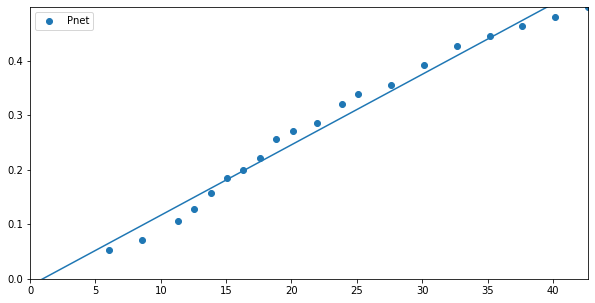

In [171]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlim((0, max(df3['H'])))
ax.set_ylim((0, max(df3['B'])))

x = np.linspace(0, max(df3['H']), 10000)

k1, k = polyfit(np.array(df3['H']), np.array(df3['B']), 1)
ax.scatter(df3['H'], df3['B'], label='B')
ax.plot(x, polyval([k1, k], x))
ax.legend()


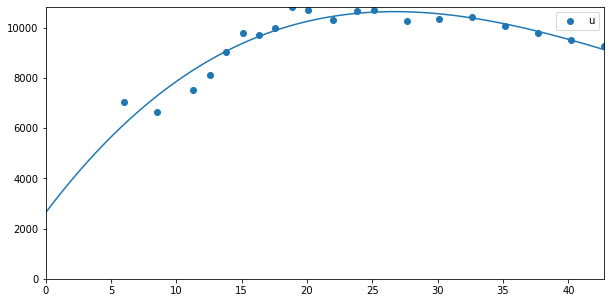

In [197]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlim((0, max(df3['H'])))
ax.set_ylim((0, max(df3['u'])))

x = np.linspace(0, max(df3['H']), 10000)

k3, k2, k1, k = polyfit(np.array(df3['H']), np.array(df3['u']), 3)
ax.scatter(df3['H'], df3['u'], label='u')
ax.plot(x, polyval([k3, k2, k1, k], x))
ax.legend()

In [212]:
maxUH = x[np.argmax(polyval([k3, k2, k1, k], x))]

print("u(H): ", polyval([k3, k2, k1, k], maxUH))
print("H: ", maxUH)


u(H):  10640.707623559694
H:  26.68963050151169


In [ ]:
# Part2

In [278]:
Hc = 0.05
Br = 1
Bs = 3

In [239]:
def FuncUp(H):
    return (Bs * (H + Hc) / (abs (H + Hc) + Hc * (Bs / Br - 1)) + u0 * H)

def FuncDown(H):
    return ((Bs * (H - Hc) / (abs (H - Hc) + Hc * (Bs / Br - 1)) + u0 * H))

def FuncAvg(H):
    return (FuncUp(H)+FuncDown(H)) / 2

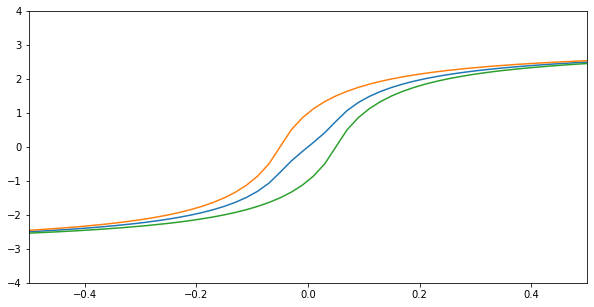

In [279]:
x = np.linspace(-10, 10, 1000)

fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlim((-0.5, 0.5))
ax.set_ylim((-4, 4))
ax.plot(x, FuncAvg(x))
ax.plot(x, FuncUp(x))
ax.plot(x, FuncDown(x))